The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):


	Pregnancies (number of times pregnant),

	Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),

	Blood Pressure (Diastolic Blood Pressure in mmHg),

	Skin Thickness (Triceps skin fold thickness in mm),

	Insulin (2 h serum insulin in mu U/ml),

	BMI (Body Mass Index in kg/m<sup>2</sup>),

	Age (years),

	Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')

In [ ]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/0.Latest_DS_Course/SL/KNN/Data/pima-indians-diabetes.data"

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np


from sklearn import metrics

In [ ]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL
# Create a python list of column names called "names"
# test = insulin test
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#pima_df = pd.read_csv(url, names= colnames)
#pima_df.head(2)

In [ ]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv(data_path, names= colnames)

In [ ]:
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima_df.desc

2.42

In [ ]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# pima_df['class'] = pima_df['class'].replace(1, "Y")
# pima_df['class'] = pima_df['class'].replace(0, "N")

In [ ]:
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima_df.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [ ]:
pima_df.to_csv("pima.csv")

In [ ]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
pima_df = pima_df.fillna(pima_df.median())

In [ ]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will
# be better than predicting class 1.

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [ ]:
pima_df.groupby("class").size()

,0
class,
0,500
1,268


In [ ]:
pima_df['class'].value_counts(normalize=True)

,proportion
class,
0,0.651042
1,0.348958


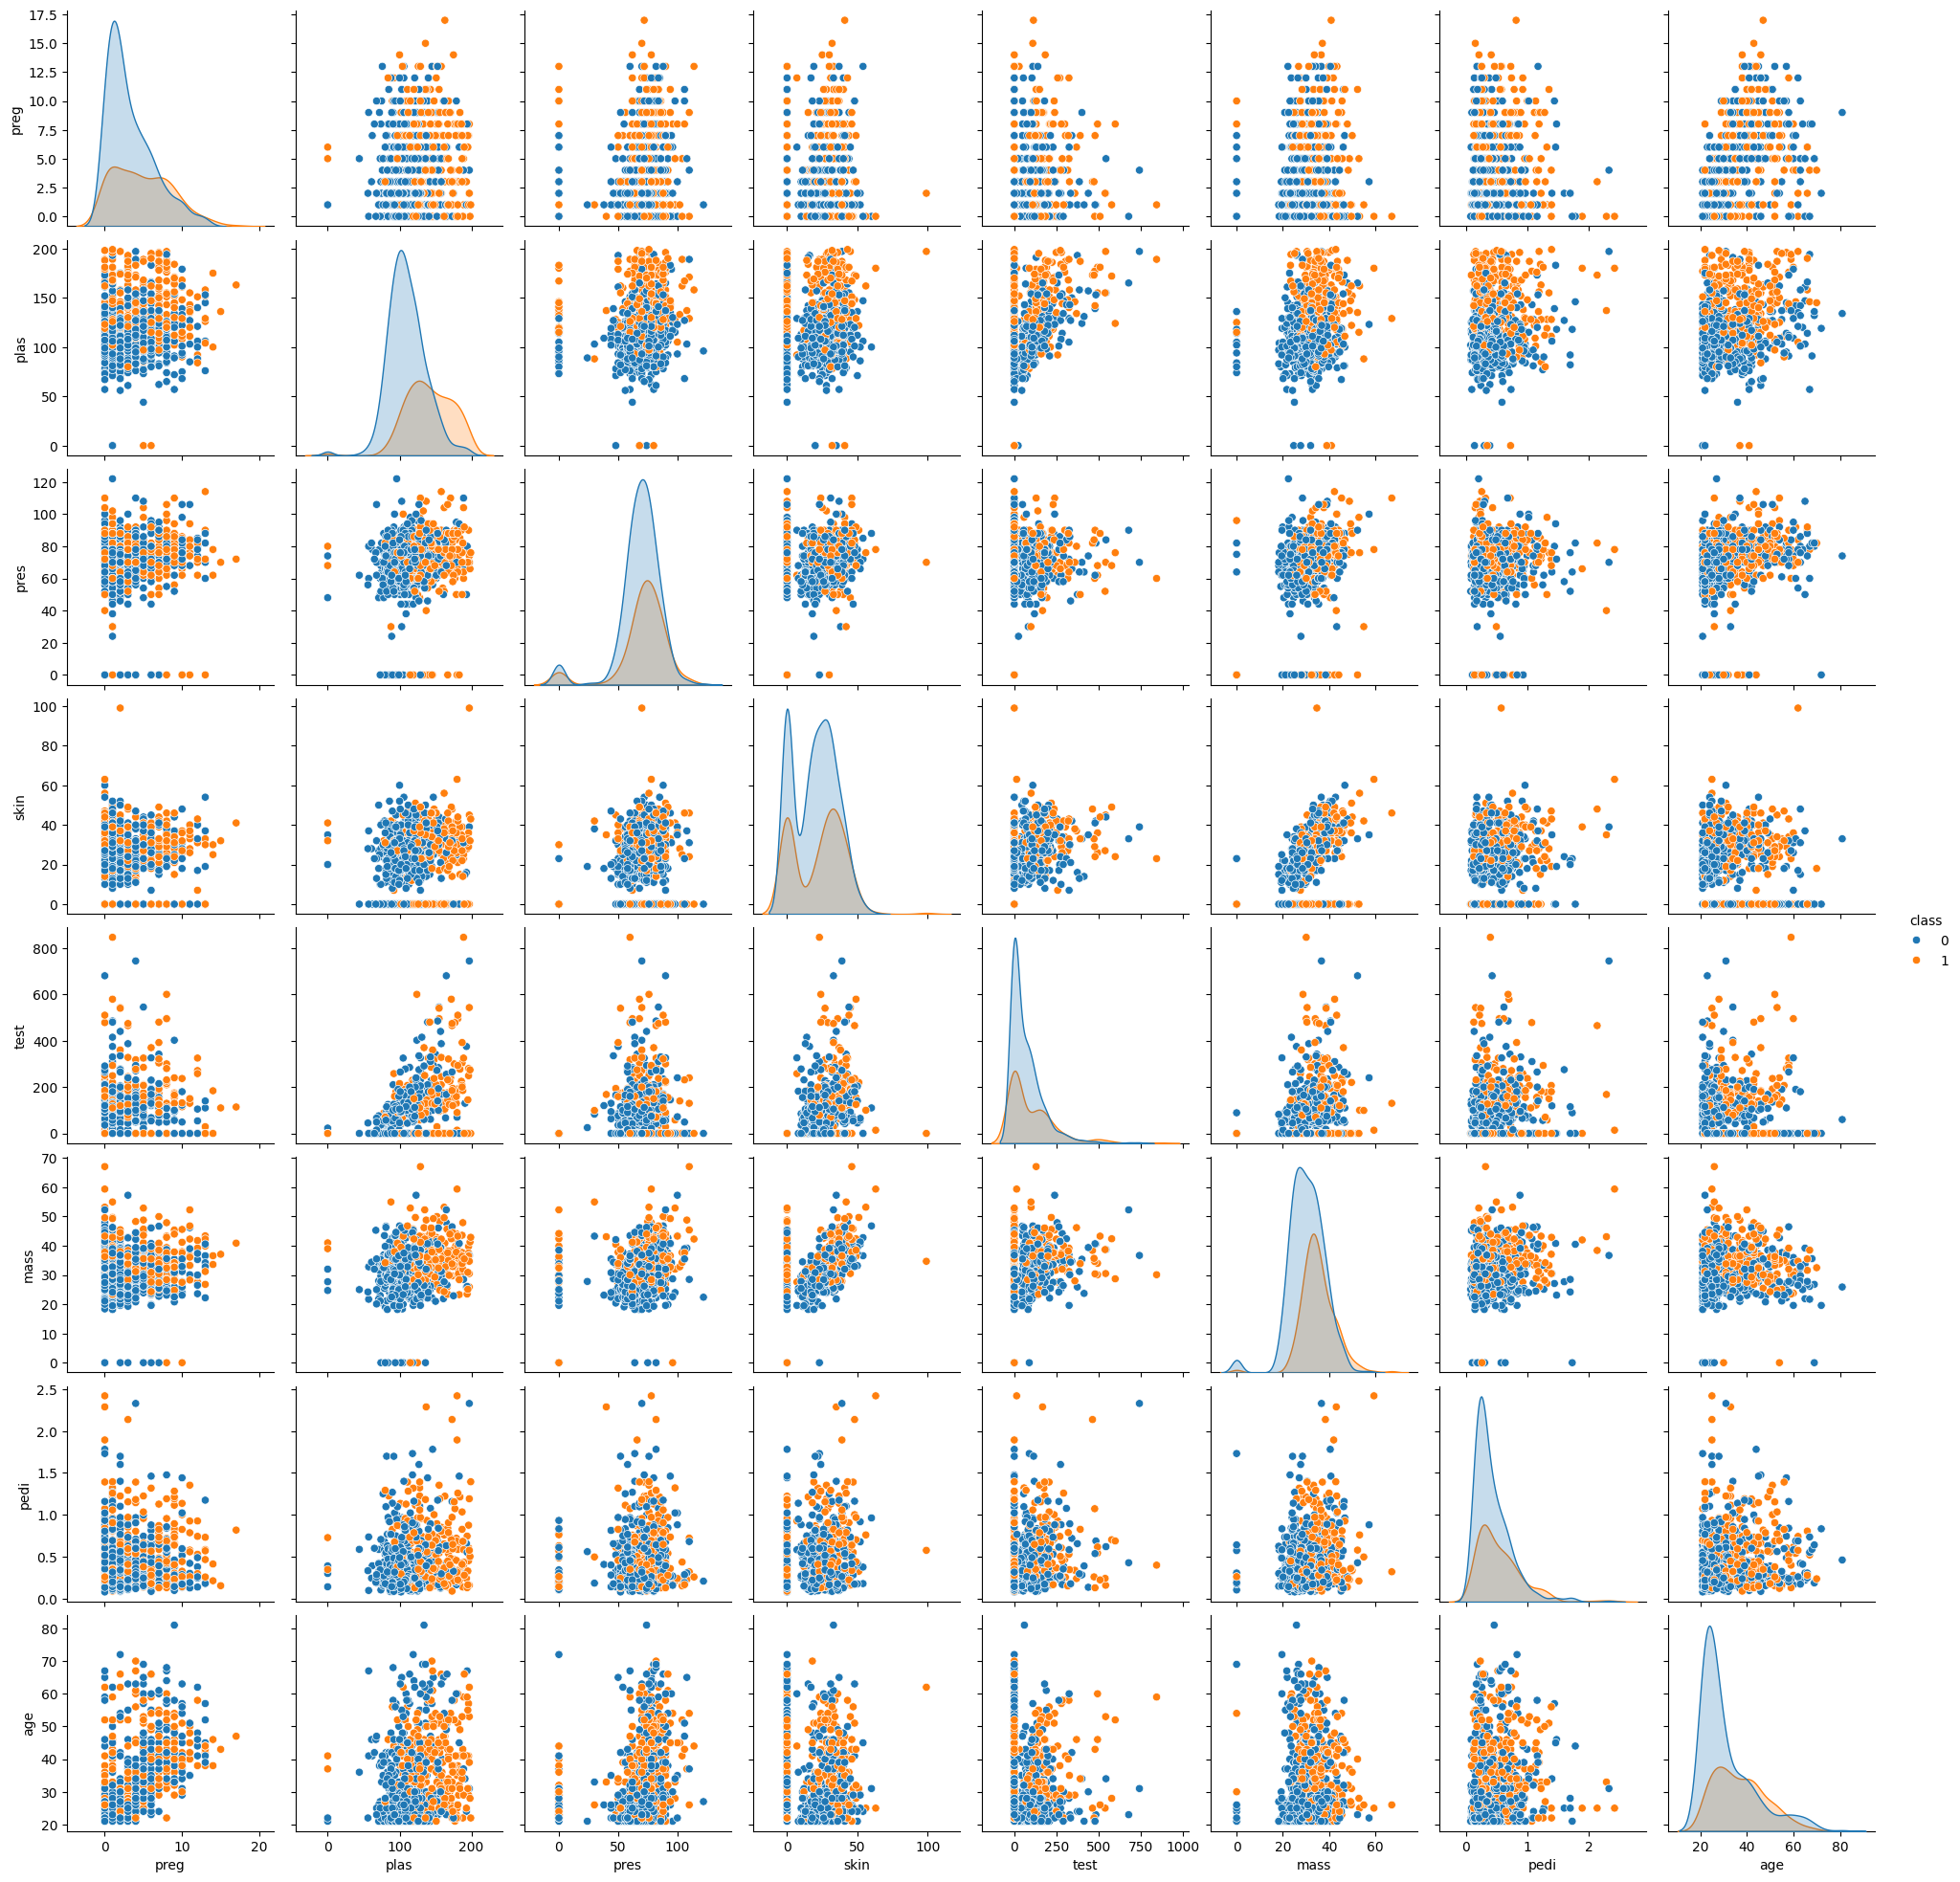

In [ ]:
# Pairplot using sns

sns.pairplot(data = pima_df, hue='class', diag_kind='kde')

In [ ]:
pima_df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [ ]:

pima_df_z = pima_df[colnames[0:8]].apply(zscore)  # convert all attributes to Z scale
pima_df_z['class'] = pima_df['class']

In [ ]:
pima_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
array = pima_df_z.values
X = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X_train.shape

(537, 8)

In [ ]:
np.sqrt(537)

23.173260452512935

In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 100)

NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.6926406926406926

In [ ]:
NNH.score(X_train, y_train)

0.7374301675977654

In [ ]:
predicted_labels

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [ ]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels)))

     0   1
0  139   8
1   63  21


In [ ]:
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.69      0.95      0.80       147
         1.0       0.72      0.25      0.37        84

    accuracy                           0.69       231
   macro avg       0.71      0.60      0.58       231
weighted avg       0.70      0.69      0.64       231



The confusion matrix shown represents the performance of a K-Nearest Neighbors (KNN) classification model on the Pima Indian Diabetes dataset. Here's how to interpret it:

- **Rows** represent the **actual classes** (from `y_test`).
- **Columns** represent the **predicted classes** (from `predicted_labels`).

The matrix is structured as follows:

\[
\begin{array}{cc}
 & \text{Predicted: No (0)} & \text{Predicted: Yes (1)} \\
\text{Actual: No (0)} & 136 & 11 \\
\text{Actual: Yes (1)} & 41 & 43 \\
\end{array}
\]

### Interpretation:

- **True Negatives (TN)**: 136
  - The model correctly predicted 136 instances as **No** (0) when they were actually **No** (0).

- **False Positives (FP)**: 11
  - The model incorrectly predicted 11 instances as **Yes** (1) when they were actually **No** (0).
  
- **False Negatives (FN)**: 41
  - The model incorrectly predicted 41 instances as **No** (0) when they were actually **Yes** (1).

- **True Positives (TP)**: 43
  - The model correctly predicted 43 instances as **Yes** (1) when they were actually **Yes** (1).

### Key Metrics:

From the confusion matrix, you can calculate several important metrics:

1. **Accuracy**:
   $[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{136 + 43}{136 + 43 + 11 + 41} \approx 0.78
   ]$
   This shows that the model is correct around 78% of the time.

2. **Precision (for class 1)**:
   $[
   \text{Precision} = \frac{TP}{TP + FP} = \frac{43}{43 + 11} \approx 0.796
   ]$
   This indicates that when the model predicts Yes (1), it is correct approximately 79.6% of the time.

3. **Recall (Sensitivity, for class 1)**:
   $[
   \text{Recall} = \frac{TP}{TP + FN} = \frac{43}{43 + 41} \approx 0.512
   ]$
   This means that the model correctly identifies around 51.2% of the actual Yes (1) cases.

4. **F1 Score** (harmonic mean of precision and recall):
   $[
   \text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} \approx \frac{2 \cdot 0.796 \cdot 0.512}{0.796 + 0.512} \approx 0.621
   ]$

This confusion matrix suggests that while the model has a good precision, its recall is lower, meaning it tends to miss a significant portion of the positive cases (diabetes cases in this context). Therefore, while the model is accurate overall, its ability to identify positive cases (those with diabetes) needs improvement.

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# # creating odd list of K for KNN
# myList = list(range(1,50))


# # empty list that will hold cv scores
# cv_scores = []
# k_neighbors = []

# # perform 10-fold cross validation
# for k in myList:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())
#     k_neighbors.append(k)


# MSE = [1 - x for x in cv_scores]
# min(MSE)
# MSE.index(min(MSE))
# best_k = myList[MSE.index(min(MSE))]
# print ("The optimal number of neighbors is %d" % best_k)

#K-FOLD CROSS VALIDATION TO FIND OPTIMUM VALUE OF K

###Why are we using K-fold cross validation in KNN:
 - In a KNN classifier, the primary hyperparameter is the number of neighbors (k). The choice of k significantly impacts the model’s performance. H

###Hyperparameter Tuning:

 - K-Fold cross-validation allows you to systematically evaluate different values of k by checking how well the model performs on different subsets of the data.
- For each candidate value of k, you can perform K-Fold cross-validation to calculate the average performance metric (e.g., accuracy, F1-score).
Model Selection:

 - By comparing the cross-validated scores for different values of k, you can select the value that leads to the best average performance across folds.
- This helps in avoiding overfitting or underfitting, as it provides a more reliable estimate of how the model will perform on unseen data.

###1.Imports

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


- KFold is a class in scikit-learn that provides a way to split the dataset into k folds.
- cross_val_score is a utility function that performs cross-validation and returns the score for each fold.

##2.Creating a List of k Values

In [ ]:
myList = list(range(1, 50))


In [ ]:
myList

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

- This line creates a list of odd integers from 1 to 49. These values represent the potential numbers of neighbors (k) that will be tested in the KNN classifier.

##3. Initializing Lists to Store Results


In [ ]:
cv_scores = []
k_neighbors = []


 - cv_scores will store the mean accuracy scores for each k after performing 10-fold cross-validation.
 - k_neighbors will store the corresponding k values tested.

##4. Performing 10-Fold Cross-Validation


In [ ]:
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

# values for scoring : https://scikit-learn.org/dev/modules/model_evaluation.html#scoring-parameter

- The loop iterates over each k value in myList.
- For each k, it creates a KNeighborsClassifier object with n_neighbors=k.
- cross_val_score is then used to perform 10-fold cross-validation on the training data (X_train, y_train), using the current k.
- The cv=10 argument specifies 10-fold cross-validation.
- scoring='accuracy' indicates that accuracy will be used as the metric to evaluate the model.
- The mean accuracy score across all 10 folds is calculated and appended to the cv_scores list.
- The corresponding k value is also appended to the k_neighbors list.

##5. Calculating Mean Squared Error (MSE)


In [ ]:
MSE = [1 - x for x in cv_scores]


- This line calculates the Mean Squared Error (MSE) for each k. In this context, it's simply 1 - accuracy, since the goal is to minimize error.
- A lower MSE corresponds to better model performance.

##6. Finding the Optimal Number of Neighbors


In [ ]:
np.argmin(MSE),MSE.index(min(MSE)), np.argmax(cv_scores), k_neighbors[13]

(13, 13, 13, 14)

In [ ]:
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)


The optimal number of neighbors is 14


- min(MSE) finds the smallest MSE, which corresponds to the best performance.
- MSE.index(min(MSE)) finds the index of this minimum MSE in the MSE list.
- best_k retrieves the corresponding value of k from myList using this index.
- The optimal k value is then printed out

##Summary
- The code systematically evaluates the performance of a KNN classifier for different numbers of neighbors (k), using 10-fold cross-validation.
- It calculates the accuracy for each k, converts it to an error metric (MSE), and identifies the k that minimizes this error.
- This process helps to select the optimal number of neighbors for the KNN classifier, balancing model complexity and performance.

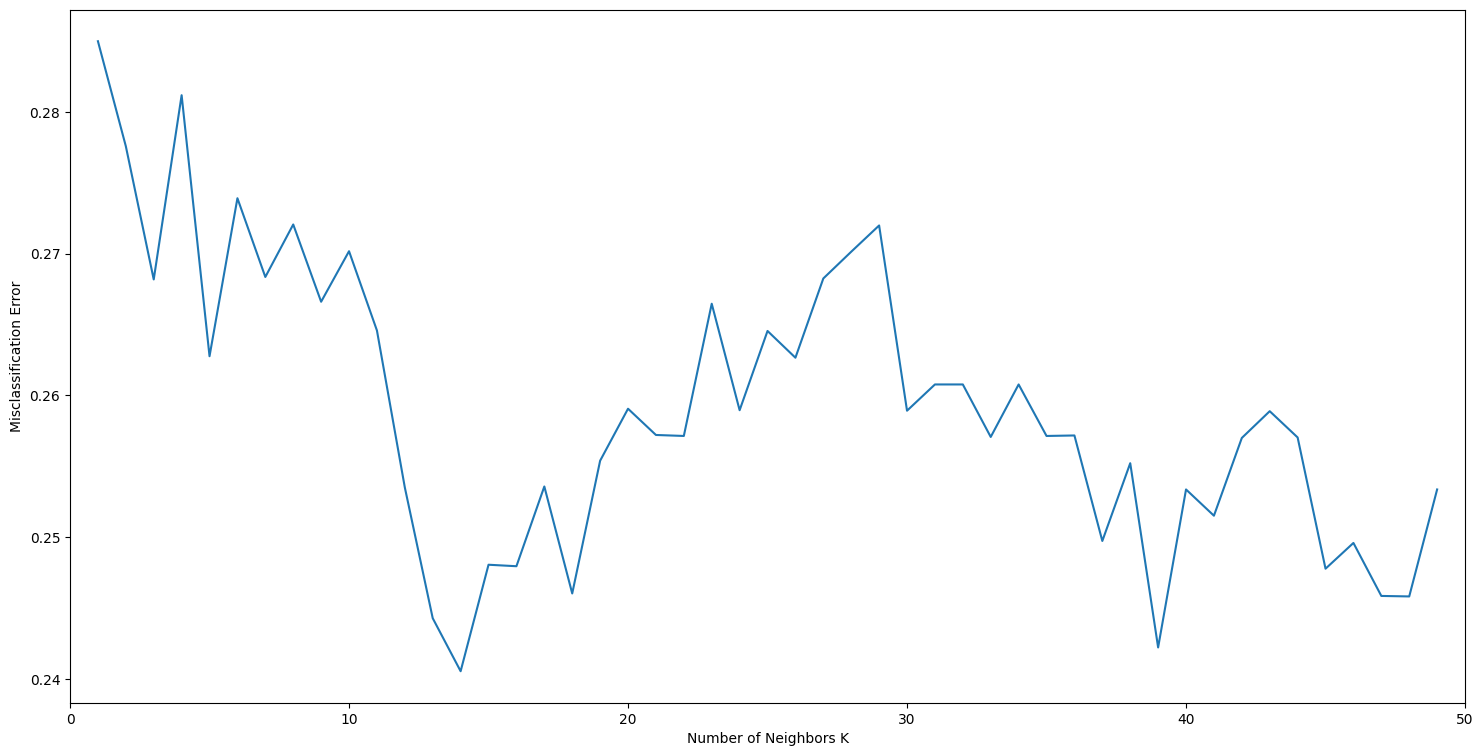

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

The graph plots the **Misclassification Error** (MSE) against the **Number of Neighbors (k)** for a K-Nearest Neighbors (KNN) classifier using 10-fold cross-validation.

### Observations:
- **X-Axis (Number of Neighbors K)**: This axis represents the values of `k` (the number of neighbors) you tested for your KNN model, ranging from 1 to 49.
  
- **Y-Axis (Misclassification Error)**: This axis represents the error rate for each value of `k`. The lower the error rate, the better the model performance.

### Interpretation:
- **Trend**:
  - Initially, as `k` increases, the misclassification error tends to decrease, indicating that the model is improving as it considers more neighbors for classification.
  - However, after a certain point, the misclassification error starts fluctuating as `k` continues to increase, showing that too many neighbors might start to hurt the model's performance due to over-smoothing, where the decision boundary becomes too soft.

- **Optimal k**:
  - The optimal value of `k` corresponds to the point where the misclassification error is at its lowest. According to the graph, this seems to be somewhere around `k = 14` (or another nearby value) where the error reaches its minimum.

### What to do Next:
- **Choose the Optimal k**: Based on the graph, you should select the `k` that corresponds to the lowest misclassification error for your final KNN model.
- **Re-train the Model**: After selecting the optimal `k`, you can retrain your KNN model using this `k` on the full training dataset and evaluate its performance on a separate test set.

This process helps ensure that the model generalizes well to unseen data, providing a balance between bias and variance.